<a href="https://colab.research.google.com/github/Qnpy2024/Data-Cleaning/blob/main/datacleanedxheatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/2024 1 Visualisasi Data & Analisis Eksplorasi Data/cleaned_data.csv', encoding='latin-1')

In [ ]:
data.head()

,movie_title,num_critic_for_reviews,duration,DIRECTOR_facebook_likes,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
0,Avatar?ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...,723,178.0,10,855,1000,760505847,886204.0,4834.0,NaN,3054,237000000,2009,936.0,7.9,2009.0
1,Pirates of the Caribbean: At World's End?ÃÂÃ...,302,NaN,563,1000,40000,309404152,471220.0,48350.0,NaN,1238,300000000,2007,5000.0,7.1,NaN
2,Spectre?ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,602,148.0,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015.0
3,The Dark Knight Rises?ÃÂÃÂÃÂÃÂÃÂÃÂ...,813,NaN,22000,23000,27000,448130642,1144337.0,106759.0,NaN,2701,250000000,2012,23000.0,8.5,NaN
4,John Carter?ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,462,132.0,"""475""",530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,NaN


In [5]:
data.describe()

,num_critic_for_reviews,duration,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
count,14.000000,11.000000,14.000000,14.000000,1.400000e+01,1.300000e+01,12.000000,9.000000,14.000000,1.400000e+01,14.000000,13.000000,14.000000,7.000000
mean,506.142857,150.727273,5866.142857,18206.428571,3.335836e+08,4.621578e+05,44773.583333,2.111111,1620.071429,2.462643e+08,2010.500000,8455.846154,7.171429,2011.142857
std,169.069789,21.679903,8289.592695,13905.214361,1.720674e+08,2.687059e+05,37290.813335,1.269296,866.672102,2.426823e+07,3.632122,8541.019541,0.673028,3.976119
min,302.000000,106.000000,161.000000,451.000000,7.305868e+07,2.122040e+05,1873.000000,1.000000,387.000000,2.000000e+08,2006.000000,393.000000,6.100000,2007.000000
25%,379.250000,141.000000,611.250000,3500.000000,2.002574e+08,2.948100e+05,9983.500000,1.000000,1024.750000,2.390000e+08,2007.250000,632.000000,6.725000,2008.000000
50%,448.000000,151.000000,1000.000000,21000.000000,3.198266e+08,3.830560e+05,47202.500000,2.000000,1240.500000,2.500000e+08,2009.500000,5000.000000,7.200000,2009.000000
75%,635.000000,162.500000,8500.000000,26000.000000,4.418561e+08,4.712200e+05,67064.750000,3.000000,2250.750000,2.560000e+08,2014.250000,11000.000000,7.500000,2015.000000
max,813.000000,183.000000,23000.000000,40000.000000,7.605058e+08,1.144337e+06,106759.000000,4.000000,3054.000000,3.000000e+08,2016.000000,23000.000000,8.500000,2016.000000


In [6]:
data.shape

(14, 16)

`data.info`digunakan untuk mengecek type data apakah berbentuk numerik atau string

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                14 non-null     object 
 1   num_critic_for_reviews     14 non-null     int64  
 2   duration                   11 non-null     float64
 3   DIRECTOR_facebook_likes    12 non-null     object 
 4   actor_3_facebook_likes     14 non-null     int64  
 5   ACTOR_1_facebook_likes     14 non-null     int64  
 6   gross                      14 non-null     int64  
 7   num_voted_users            13 non-null     float64
 8   Cast_Total_facebook_likes  12 non-null     float64
 9   facenumber_in_poster       9 non-null      float64
 10  num_user_for_reviews       14 non-null     int64  
 11  budget                     14 non-null     int64  
 12  title_year                 14 non-null     int64  
 13  ACTOR_2_facebook_likes     13 non-null     float64
 

`data.isnull`digunakan untuk mengecek data yang kosong atau yang hilang pada data

In [8]:
data.isnull().sum()

,0
movie_title,0
num_critic_for_reviews,0
duration,3
DIRECTOR_facebook_likes,2
actor_3_facebook_likes,0
ACTOR_1_facebook_likes,0
gross,0
num_voted_users,1
Cast_Total_facebook_likes,2
facenumber_in_poster,5


`iris_df = pd.read_csv`digunakan untuk membaca data yang akan dibersihkan
`numeric_colomns`digunakan untuk memisahkan colom data yang mempunyai data hilang berdasarkan typenya(numerik)
`string_colomns`digunakan untuk memisahkan colom data yang mempunyai data hilang berdasarkan typenya(string)
`for col in numeric_columns:`digunakan untuk menangani data kosong type numerik dengan cara menggunakan'mean'atau rata-rata
`for col in string_columns:`digunakan untuk menangani data kosong type string dengan cara menggunakan'modus'atau nilai/data yang sering muncul
`iris_df.to_csv`digunakan untuk menyimpan hasil data kosong yang selesai atau sudah dibersihkan


In [11]:
iris_df = pd.read_csv('/content/drive/MyDrive/2024 1 Visualisasi Data & Analisis Eksplorasi Data/cleaned_data.csv', encoding='latin-1')
numeric_columns = ['duration', 'num_voted_users', 'Cast_Total_facebook_likes', 'facenumber_in_poster','ACTOR_2_facebook_likes', 'title_year.1']
string_columns = ['DIRECTOR_facebook_likes', ]

for col in numeric_columns:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)

for col in string_columns:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

iris_df.to_csv('cleaned_data.csv', index=False)
data.to_csv('/content/unclean_data.csv', index=False)
print("\nJumlah data yang kosong setelah penanganan:")
print(data.isnull().sum())


Jumlah data yang kosong setelah penanganan:
movie_title                  0
num_critic_for_reviews       0
duration                     0
DIRECTOR_facebook_likes      0
actor_3_facebook_likes       0
ACTOR_1_facebook_likes       0
gross                        0
num_voted_users              0
Cast_Total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
ACTOR_2_facebook_likes       0
imdb_score                   0
title_year.1                 0
dtype: int64


<ipython-input-11-8acac74ae70b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_value, inplace=True)


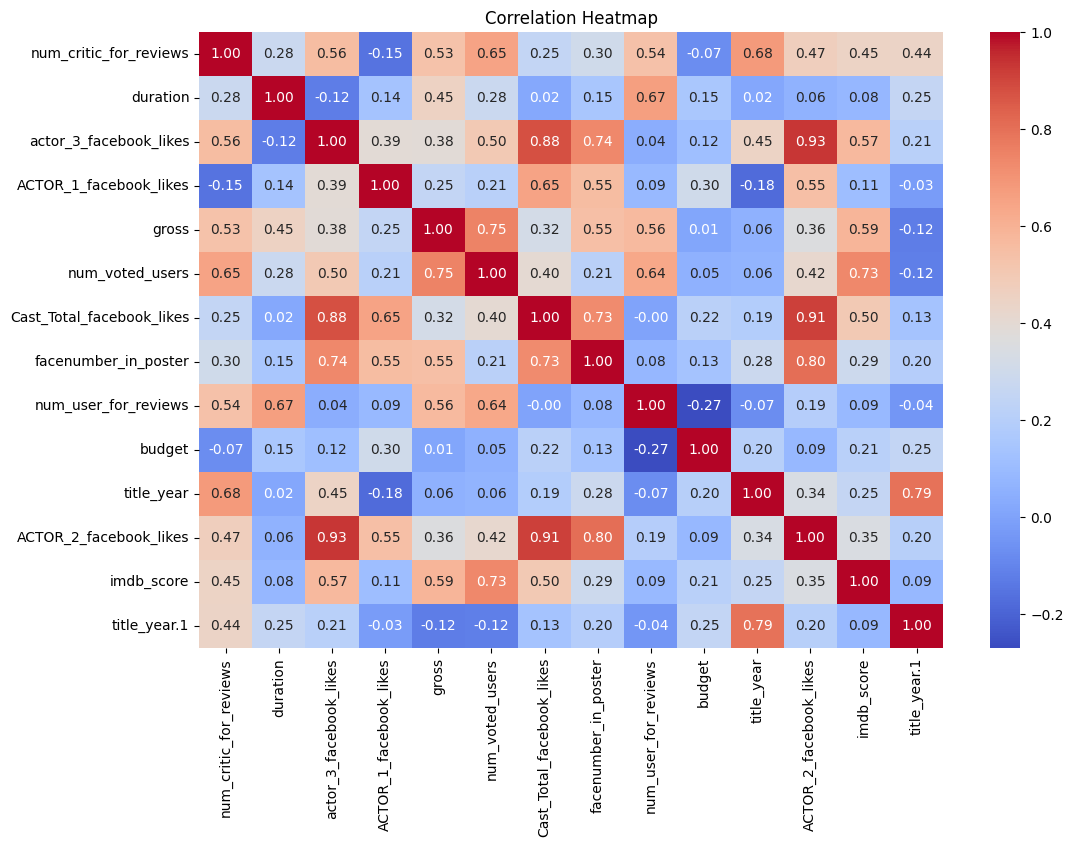

In [12]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X = data.iloc[:,-12]
X.head(10)

,actor_3_facebook_likes
0,855
1,1000
2,161
3,23000
4,530
5,4000
6,284
7,19000
8,19000
9,10000


In [14]:
y = data.iloc[:,-3]
y.head(5)

,ACTOR_2_facebook_likes
0,936.0
1,5000.0
2,393.0
3,23000.0
4,632.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11,)
(3,)
(11,)
(3,)


In [17]:
linear = LinearRegression()
linear.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [18]:
linear.coef_

array([0.94931283])

In [19]:
linear.intercept_

2694.9637499930577

In [20]:
Y_pred = linear.predict(np.array(X_test).reshape(-1,1))

In [21]:
Y_pred

array([12188.09200487,  3552.19323141,  3506.62621579])

In [22]:
y_test

,ACTOR_2_facebook_likes
9,11000.0
11,10000.0
0,936.0


In [23]:
score = r2_score(y_test,Y_pred)
score

0.19333373045263202

Text(0, 0.5, 'ACTOR_2_facebook_likes')

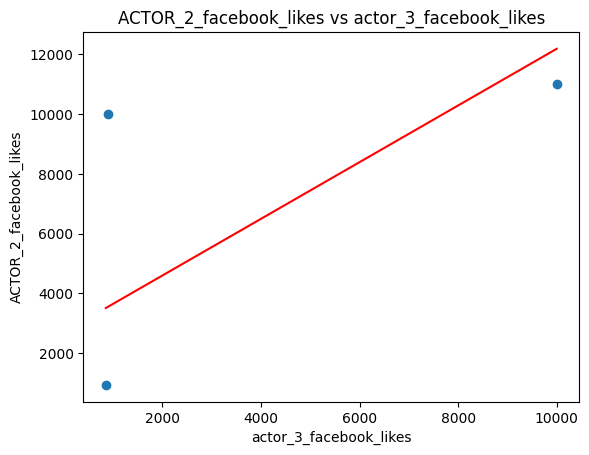

In [24]:
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_pred,color='red')
plt.title('ACTOR_2_facebook_likes vs actor_3_facebook_likes')
plt.xlabel('actor_3_facebook_likes')
plt.ylabel('ACTOR_2_facebook_likes')

In [25]:
X = data.iloc[:,-8]
X.head(10)

,Cast_Total_facebook_likes
0,4834.000000
1,48350.000000
2,11700.000000
3,106759.000000
4,1873.000000
5,46055.000000
6,44773.583333
7,92000.000000
8,92000.000000
9,58753.000000


In [26]:
y = data.iloc[:,-3]
y.head(5)

,ACTOR_2_facebook_likes
0,936.0
1,5000.0
2,393.0
3,23000.0
4,632.0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=51)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9,)
(5,)
(9,)
(5,)


In [29]:
linear = LinearRegression()
linear.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [ ]:
linear.coef_

array([0.14873717])

In [ ]:
linear.intercept_

770.4711371747971

In [ ]:
Y_pred = linear.predict(np.array(X_test).reshape(-1,1))

In [ ]:
Y_pred

array([16649.50217768, 14454.2903536 ,  2510.69597231, 14454.2903536 ,
        7961.91308407])

In [ ]:
y_test

,ACTOR_2_facebook_likes
3,23000.0
8,21000.0
2,393.0
7,21000.0
1,5000.0


In [ ]:
score = r2_score(y_test,Y_pred)
score

0.6870975120924316

Text(0, 0.5, 'ACTOR_2_facebook_likes')

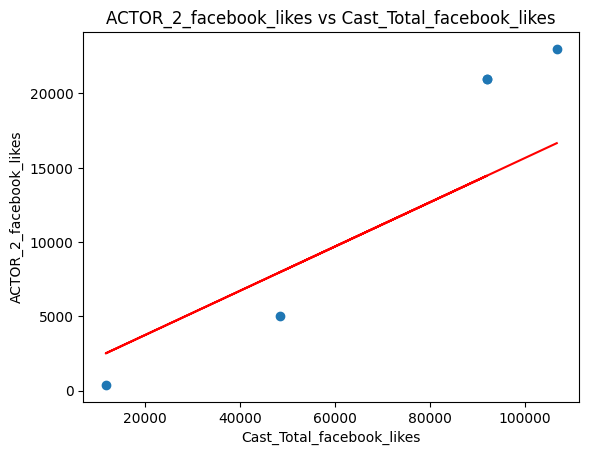

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_pred,color='red')
plt.title('ACTOR_2_facebook_likes vs Cast_Total_facebook_likes')
plt.xlabel('Cast_Total_facebook_likes')
plt.ylabel('ACTOR_2_facebook_likes')

In [ ]:
X = data.iloc[:,-12]
X.head(10)

,actor_3_facebook_likes
0,855
1,1000
2,161
3,23000
4,530
5,4000
6,284
7,19000
8,19000
9,10000


In [ ]:
y = data.iloc[:,-8]
y.head(5)

,Cast_Total_facebook_likes
0,4834.0
1,48350.0
2,11700.0
3,106759.0
4,1873.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=51)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9,)
(5,)
(9,)
(5,)


In [ ]:
linear = LinearRegression()
linear.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [ ]:
linear.coef_

array([4.01018658])

In [ ]:
linear.intercept_

21773.087954912684

In [ ]:
Y_pred = linear.predict(np.array(X_test).reshape(-1,1))

In [ ]:
Y_pred

array([114007.37929808,  97966.63297753,  22418.72799431,  97966.63297753,
        25783.27453505])

In [ ]:
y_test

,Cast_Total_facebook_likes
3,106759.0
8,92000.0
2,11700.0
7,92000.0
1,48350.0


In [ ]:
score = r2_score(y_test,Y_pred)
score

0.8791135885952975

Text(0, 0.5, 'Cast_Total_facebook_likes')

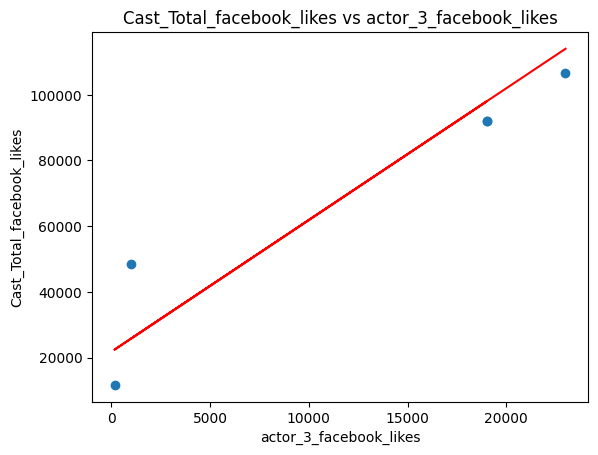

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_pred,color='red')
plt.title('Cast_Total_facebook_likes vs actor_3_facebook_likes')
plt.xlabel('actor_3_facebook_likes')
plt.ylabel('Cast_Total_facebook_likes')